In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
sys.path.append('/home/manu/TFG_repo/scripts')  # make modules in scripts folder callable from notebooks

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from datetime import datetime, timedelta, timezone
from datetime import timezone
sys.path.append('/home/manu/TFG_repo/scripts')

In [34]:
from config import data_dir
from analysis_functions import *
plt.style.use('/home/manu/TFG_repo/notebooks/notebook.mplstyle')

In [35]:
def compare_fit(df_1, df_2, temp, pres, loc):
    
    temp = if_masked_to_array(temp[loc])
    pres = if_masked_to_array(pres[loc])
    zz = np.linspace(0, pres[-1] + 5, 300)    
    
    fig, ax = plt.subplots(figsize=(4, 4.6875))
    ax.scatter(temp, pres, marker='o', fc='None', ec='tab:red', s=22)
    ax.axhline(df_1.iloc[loc, 3], c='grey', ls='--', label='MLD ref') # plot MLD
    ax.axhline(df_2.iloc[loc, 3], c='grey', ls=':', label='MLD ref new tol') # plot MLD
    ax.set_ylim(pres[-1] + 10, 0)
    ax.set_xlim(9.5, 18)
    ax.plot(fit_function(zz, df_1, loc), zz, ls='--', label='ref')
    ax.plot(fit_function(zz, df_2, loc), zz, label='ref new tol')
    ax.set_xlabel('Temperature (ºC)')
    ax.set_ylabel('Depth (mb)')
    ax.set_title(df_1['Dates'].iloc[loc])
    ax.legend()
    fig.tight_layout()
    plt.show()

def distance(df_fit, variable, n, value):
    '''Given variable of df_fit, return the locs where the diference between
    slices [n:] - [:-n] in that variable are greater than value.
    '''
    array = df_fit[variable].to_numpy()
    locs = np.where(abs(array[n:] - array[:-n]) > value)[0]
    ratio = len(locs)/len(df_fit)
    return locs, ratio
                    
def n_worst_profiles(df_fit, n):
    em = df_fit['em'].to_numpy()
    indices = np.argpartition(em, -n)[-n:]
    return indices

In [105]:
temp, depth, date = load_time_series('test/test_1.nc')
df_ref = load_SHDR_fit('SHDR_trials/test_1_ref.csv')
df_0607 = load_SHDR_fit('SHDR_trials/test_1_ref_cont_07_1.3_06_07.csv')
df_0707 = load_SHDR_fit('SHDR_trials/test_1_07_07.csv')
df_0607_r = load_SHDR_fit('SHDR_trials/test_1_red_relaxed_cont_06_07.csv')
df_0607_b5 = load_SHDR_fit('SHDR_trials/test_1_06_07_bias5.csv')
df_0607_k02 = load_SHDR_fit('SHDR_trials/test_1_06_07_exp_bias.csv')
df_0607_box = load_SHDR_fit('SHDR_trials/test_1_061_071_convolv.csv')
df_0607_hann = load_SHDR_fit('SHDR_trials/test_1_061_071_convolv_hann.csv')
df_0607_more = load_SHDR_fit('SHDR_trials/test_1_061_071_more_gen.csv')
df_0607_high = load_SHDR_fit('SHDR_trials/test_1_061_071_more_gen_high_tol.csv')

In [106]:
print(mean_and_std(df_ref, 'em'))
print(mean_and_std(df_0607, 'em'))
print(mean_and_std(df_0707, 'em'))
print(mean_and_std(df_0607_r, 'em'))
print(mean_and_std(df_0607_k02, 'em'))
print(mean_and_std(df_0607_box, 'em'))
print(mean_and_std(df_0607_hann, 'em'))
print(mean_and_std(df_0607_more, 'em'))
print(mean_and_std(df_0607_high, 'em'))

(0.08183741506123547, 0.03200814366677624)
(0.0730297023504201, 0.026120068423577978)
(0.07303282210395164, 0.0261954514884221)
(0.07305014520759633, 0.02618595832241966)
(0.03929138924418308, 0.014507955698873736)
(0.07284657441591559, 0.02611219774463399)
(0.029170550005189505, 0.01110813013852313)
(0.07300518450869592, 0.026156025498442592)
(0.07302763561411617, 0.02616360119634295)


In [108]:
print(distance(df_ref, 'D1', 1, 5)[1])
print(distance(df_0607, 'D1', 1, 5)[1])
print(distance(df_0707, 'D1', 1, 5)[1])
print(distance(df_0607_r, 'D1', 1, 5)[1])
print(distance(df_0607_k02, 'D1', 1, 5)[1])
print(distance(df_0607_box, 'D1', 1, 5)[1])
print(distance(df_0607_hann, 'D1', 1, 5)[1])
print(distance(df_0607_more, 'D1', 1, 5)[1])
print(distance(df_0607_high, 'D1', 1, 5)[1])

0.27349828820417055
0.030034235916588856
0.03104575163398693
0.03221288515406162
0.028244631185807657
0.015717398070339245
0.0350140056022409
0.03314659197012138
0.031901649548708375


In [21]:
print(mean_and_std(df_0607_k02, 'b2'))
print(distance(df_0607_k02, 'b2', 1, 1e-4)[1])

(0.004676674792057977, 0.01516266340012172)
0.15538437597261126


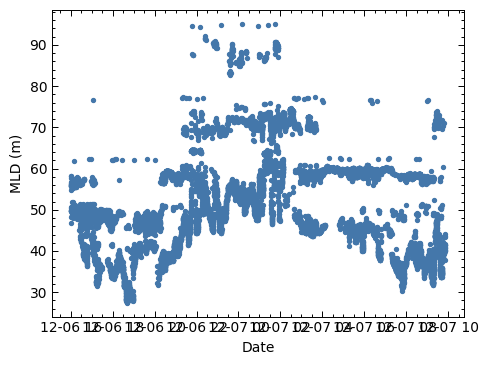

In [93]:
plot_fit_variable(df_ref, 'D1')

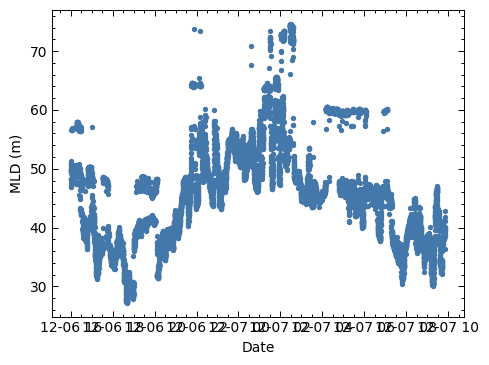

In [110]:
plot_fit_variable(df_0607, 'D1')

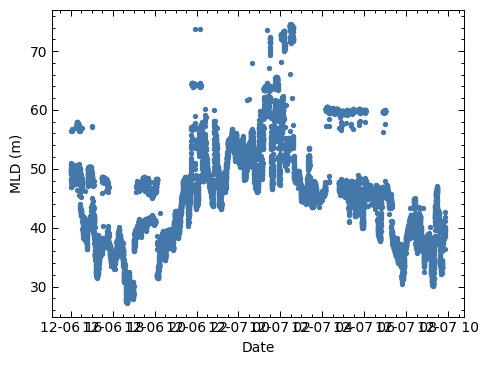

In [109]:
plot_fit_variable(df_0607_high, 'D1')

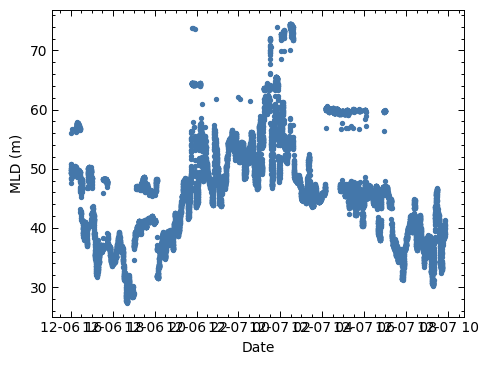

In [61]:
plot_fit_variable(df_0607_box, 'D1')

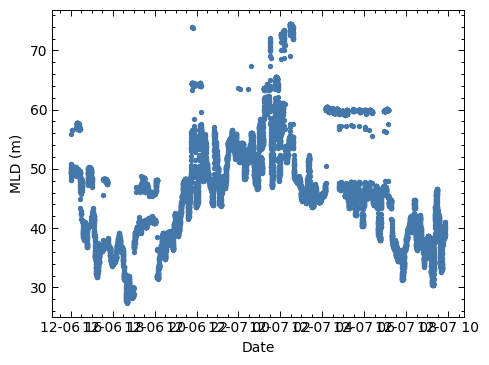

In [78]:
plot_fit_variable(df_0607_hann, 'D1')

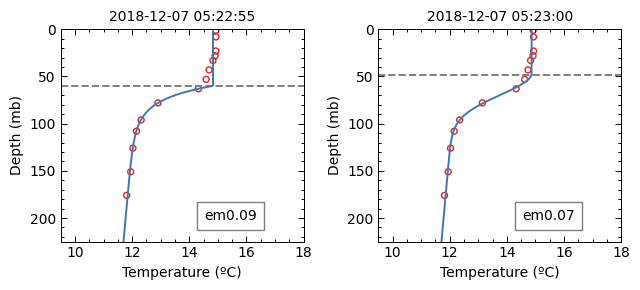

            em
9635  0.090938
9636  0.066059


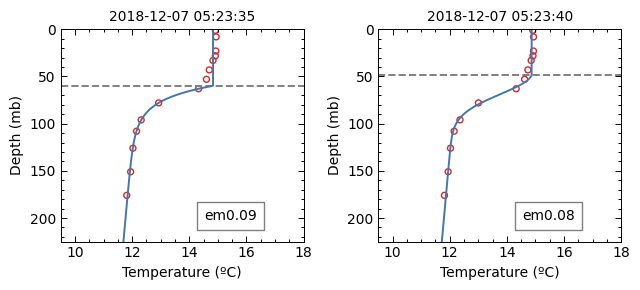

            em
9643  0.087071
9644  0.074989


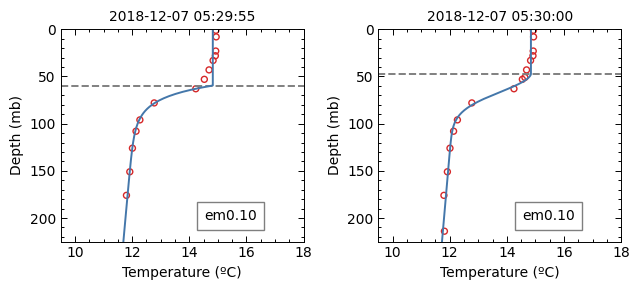

            em
9719  0.104355
9720  0.105909


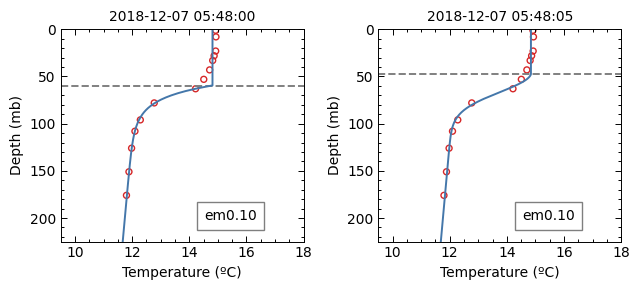

            em
9936  0.103026
9937  0.102693


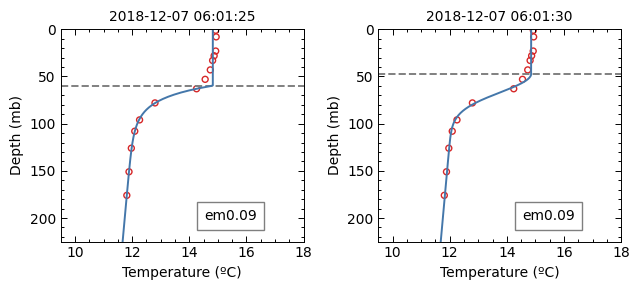

             em
10097  0.091069
10098  0.092852


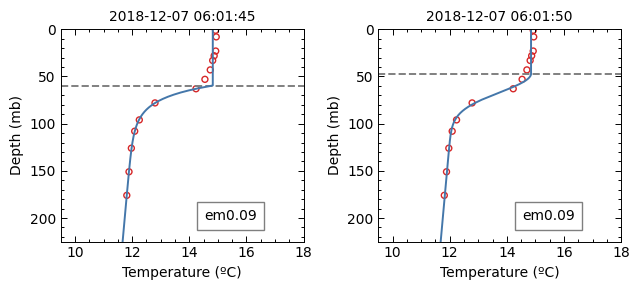

             em
10101  0.092771
10102  0.097745


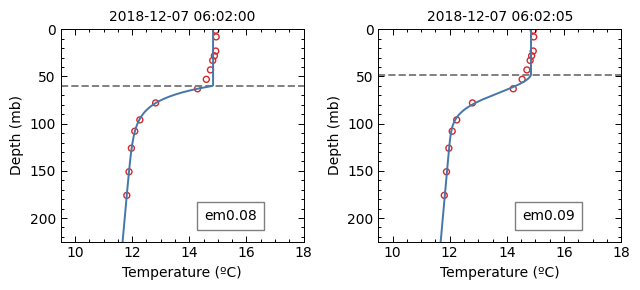

             em
10104  0.082984
10105  0.097644


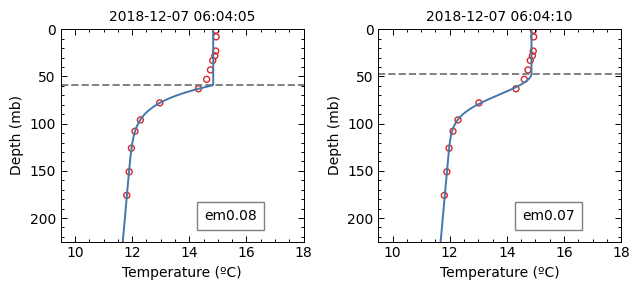

             em
10129  0.076297
10130  0.080342


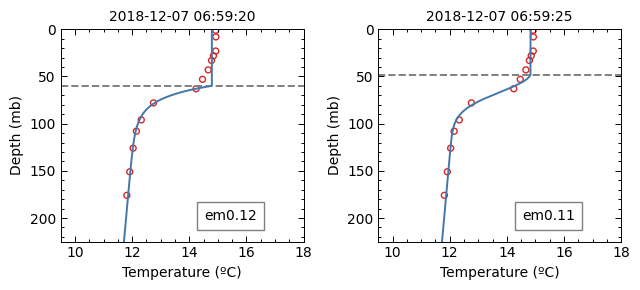

             em
10792  0.117069
10793  0.115925


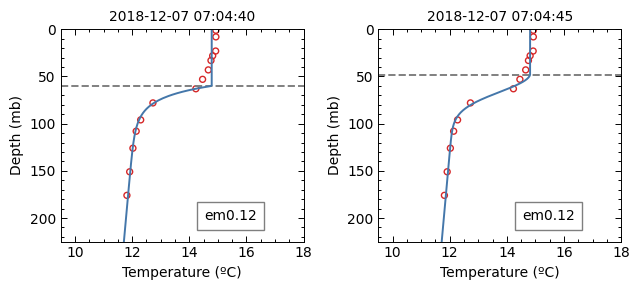

             em
10856  0.115610
10857  0.116312


In [123]:
locs_1 = distance(df_0607, 'D1', 1, 10)[0][-10:]
for i in locs_1:
    plot_multiple_profiles(df_0607, temp, depth, [i, i+1])
    print(df_ref.loc[[i, i+1], ['em']])

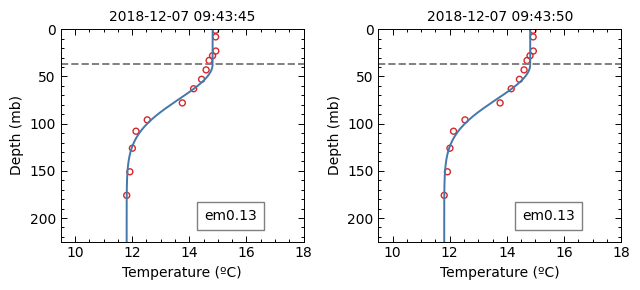

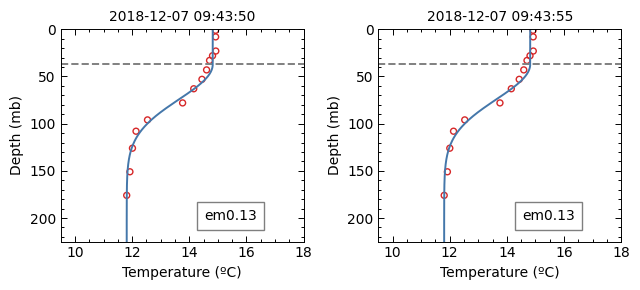

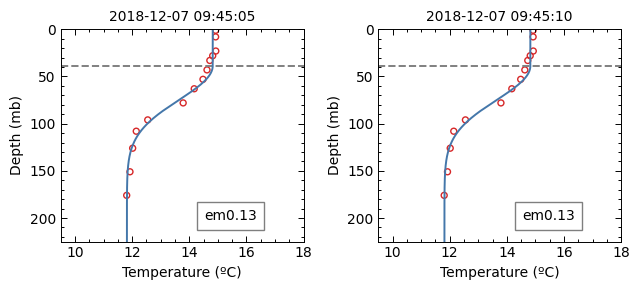

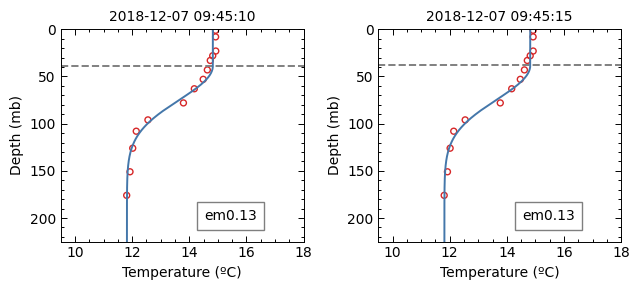

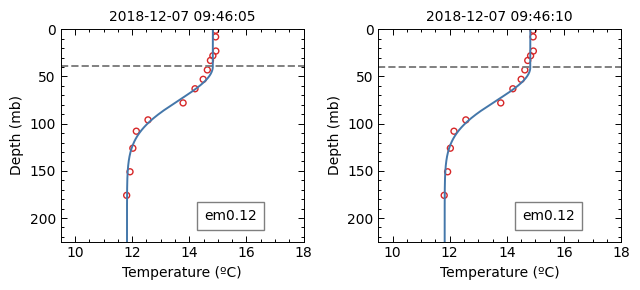

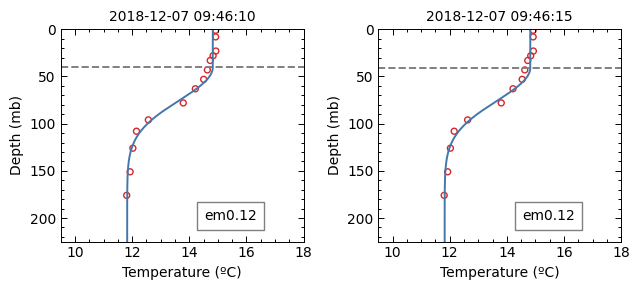

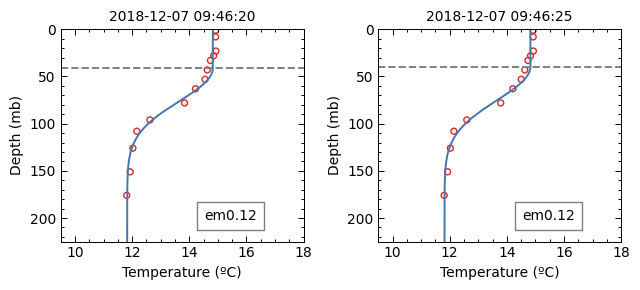

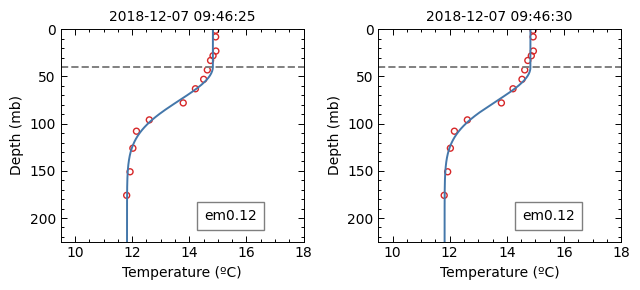

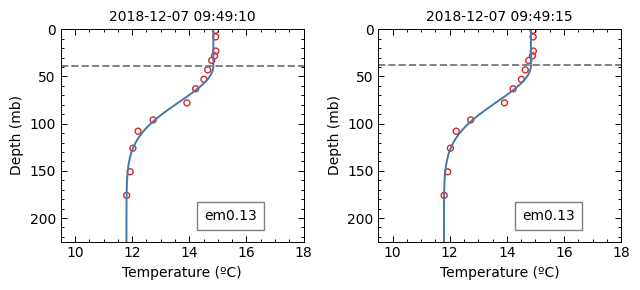

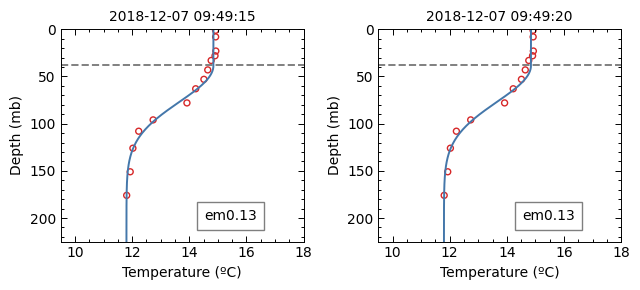

In [38]:
for i in locs_1:
    plot_multiple_profiles(df_0607, temp, depth, [i, i+1])

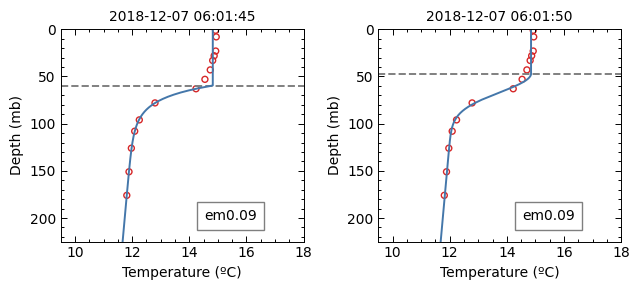

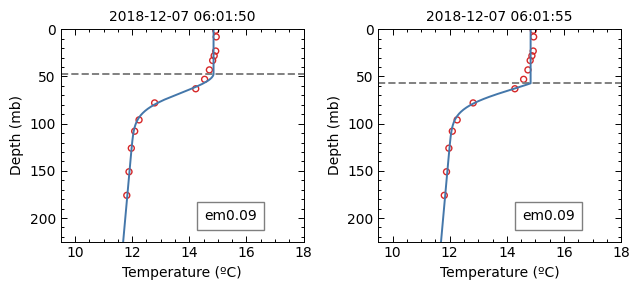

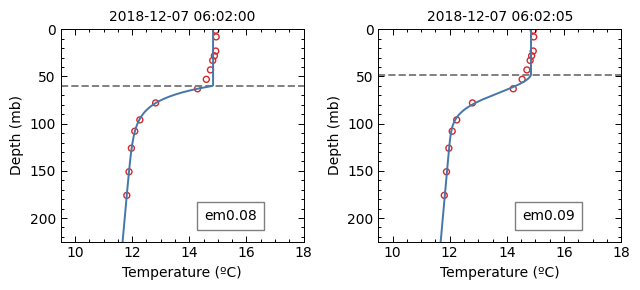

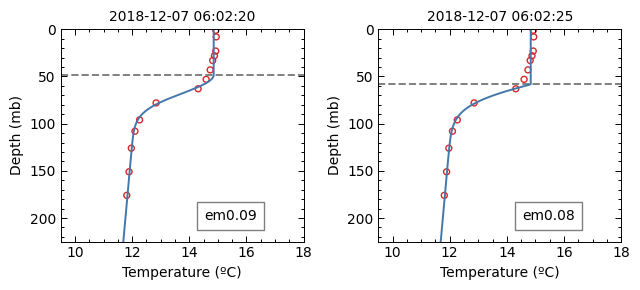

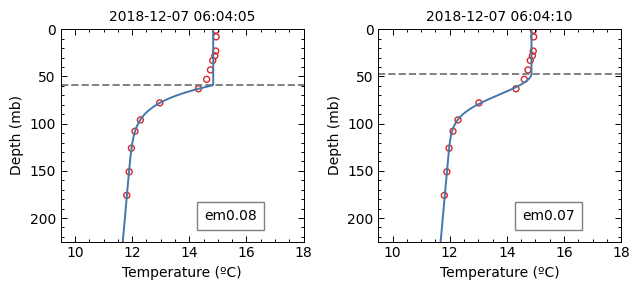

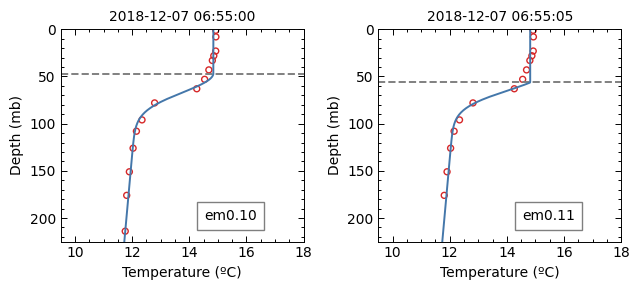

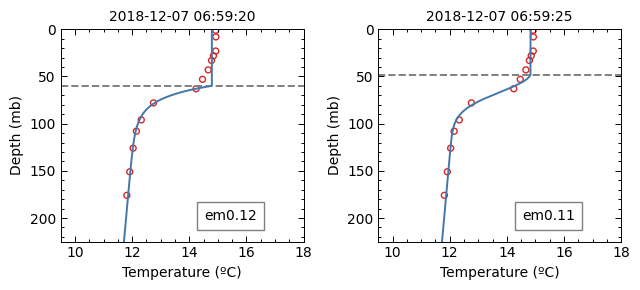

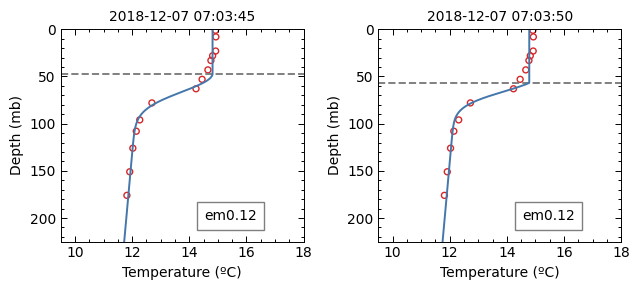

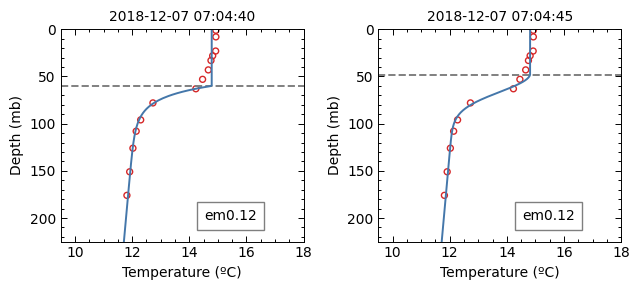

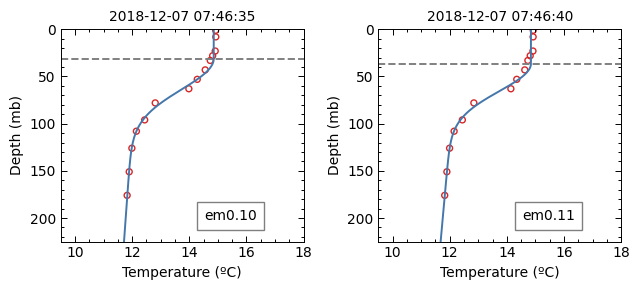

In [39]:
locs_2 = distance(df_0607, 'D1', 1, 5)[0][-10:]
for i in locs_2:
    plot_multiple_profiles(df_0607, temp, depth, [i, i+1])

In [48]:
date_to_iloc(date, datetime(2018,12,7,7,4,40))

10856